# Introduction to Data Science – Homework 4
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 19, 11:59pm.

In this homework, you will study Salt Lake City air quality data and complete an A/B test comparing two ads. 

## Your Data
Fill out the following information: 

* First Name: Andreas 
* Last Name: Martinson
* E-mail: andreas.martinson@utah.edu
* UID: u1291396 


In [2]:
# imports and setup 
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part 1: SLC Air Quality Index 

In this problem, you'll study the Air Quality at Hawthorn Elementary School in Salt Lake City. 

### Task 1.0.  Learn about AQI

Read about the [air quality index (AQI)](https://airnow.gov/index.cfm?action=aqibasics.aqi) and the 
[AirNow](https://www.airnow.gov/) system. 


### Task 1.1. Download data
The EPA gives access to historical air quality data at the AirData website. Read about the data available on [this information page](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information).


Go to [this website](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) and download the following daily data: 
1. Pollutant = PM2.5
+ Year = 2019
+ City = Salt Lake City, UT
+ Monitor Site = 490353006 (Hawthorn Elementary School)



### Task 1.2. Import the data 
Use the pandas.read_csv() function to import the data

A word of warning: this data isn't very clean:

+ The dates are not sorted. 
+ Some dates may have missing values.
+ Some dates may have multiple values corresponding to different sensors (POC=1,2,4).   

In [3]:
air_data = pd.read_csv('ad_viz_plotval_data.csv', parse_dates=True)

air_data['Date'] = pd.to_datetime(air_data['Date']) #parse dates didn't work, so I used the datetime function
air_data.shape
air_data.info() # looks like there are no missing dates
air_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            1039 non-null   datetime64[ns]
 1   Source                          1039 non-null   object        
 2   Site ID                         1039 non-null   int64         
 3   POC                             1039 non-null   int64         
 4   Daily Mean PM2.5 Concentration  1039 non-null   float64       
 5   UNITS                           1039 non-null   object        
 6   DAILY_AQI_VALUE                 1039 non-null   int64         
 7   Site Name                       1039 non-null   object        
 8   DAILY_OBS_COUNT                 1039 non-null   int64         
 9   PERCENT_COMPLETE                1039 non-null   float64       
 10  AQS_PARAMETER_CODE              1039 non-null   int64         
 11  AQS_

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2019-01-01,AQS,490353006,1,3.4,ug/m3 LC,14,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
1,2019-01-02,AQS,490353006,1,12.5,ug/m3 LC,52,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
2,2019-01-03,AQS,490353006,1,21.5,ug/m3 LC,71,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
3,2019-01-04,AQS,490353006,1,31.7,ug/m3 LC,92,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
4,2019-01-05,AQS,490353006,1,39.5,ug/m3 LC,111,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222


### Task 1.3. Plot the data

Plot the daily mean PM2.5 concentration and daily AQI value. Since there are multiple POCs for each day, plot the data in each of the following ways:
1. Average the daily mean PM2.5 concentration and daily AQI value over the POCs for each day. In a single figure, plot date vs. each of these two quantities. 
2. Make two plots, one for daily mean PM2.5 concentration and the other for daily AQI value. In the first plot, plot the daily mean PM2.5 concentration for each POC value (POC=1,2,4) seperately. In the second plot, plot the daily AQI value for each POC value (POC=1,2,4) seperately. 

*Hint*: use the pandas groupby function


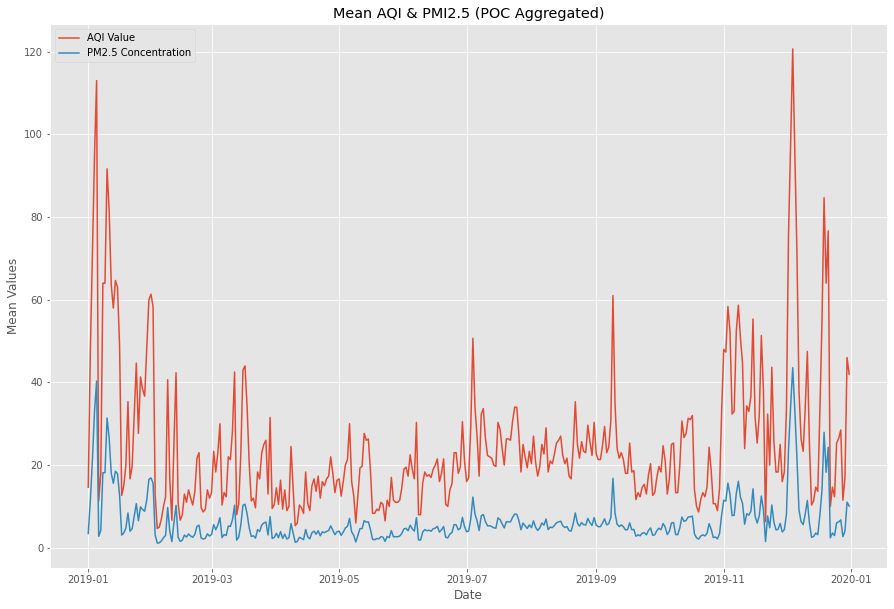

<Figure size 1080x720 with 0 Axes>

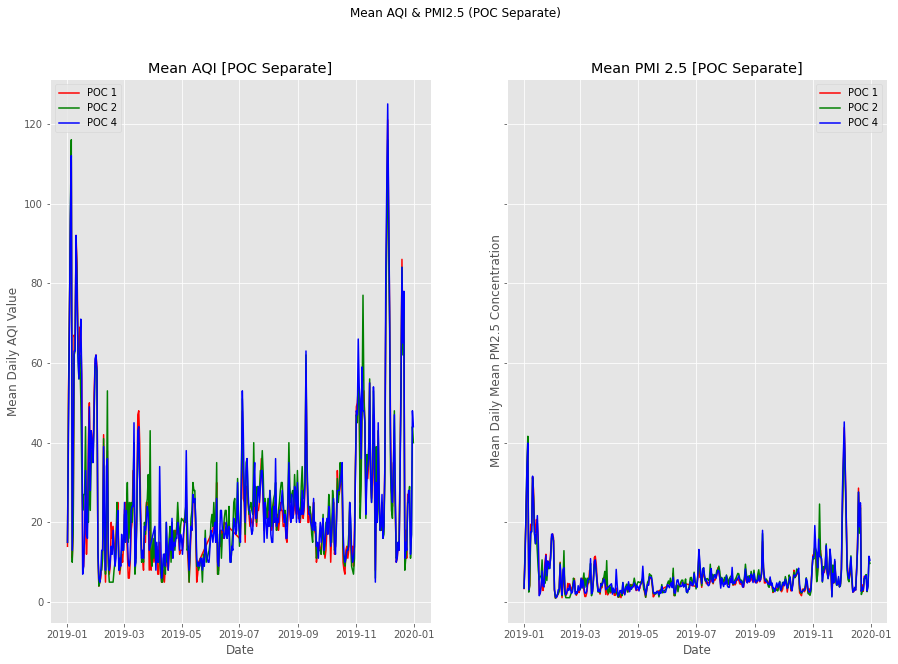

In [12]:
#1 
air_data_agg = air_data.groupby(['Date'])[['DAILY_AQI_VALUE', 'Daily Mean PM2.5 Concentration']].mean()
plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()
ax.plot(air_data_agg.index, 'DAILY_AQI_VALUE', data=air_data_agg, label='AQI Value')
ax.plot(air_data_agg.index, 'Daily Mean PM2.5 Concentration', data=air_data_agg, label='PM2.5 Concentration')
ax.set(xlabel='Date', ylabel='Mean Values', title='Mean AQI & PMI2.5 (POC Aggregated)')
ax.legend()
plt.show()

#2 
air_data_agg2 = air_data.groupby(['Date', 'POC'], as_index=False)[['DAILY_AQI_VALUE', 'Daily Mean PM2.5 Concentration']].mean()
air_data_agg2 = air_data_agg2.set_index('Date')
plt.clf()
fig, ax = plt.subplots(1,2, sharey=True)
fig.suptitle('Mean AQI & PMI2.5 (POC Separate)')

colors = ['red','green','blue'] 
POC = [1,2,4]

for i in range(3):
    air_data_agg_POC = air_data_agg2[air_data_agg2['POC'] == POC[i]]
    ax[0].plot(air_data_agg_POC.index, air_data_agg_POC['DAILY_AQI_VALUE'], color=colors[i], label=('POC ' + str(POC[i])))
    ax[1].plot(air_data_agg_POC.index, air_data_agg_POC['Daily Mean PM2.5 Concentration'], color=colors[i], label=('POC ' + str(POC[i])))
ax[0].legend()
ax[1].legend()
ax[0].set(xlabel='Date', ylabel='Mean Daily AQI Value', title='Mean AQI [POC Separate]')
ax[1].set(xlabel='Date', ylabel='Mean Daily Mean PM2.5 Concentration', title='Mean PMI 2.5 [POC Separate]')

plt.show()

### Task 1.4. Plot a moving average

Make a plot with both the daily AQI value and a moving average for the daily AQI value. Use the daily AQI value that is averaged over the POC. Experiment with different time windows to find one that is reasonable.

*Hint:* Use the rolling() function as in Lecture 8. 

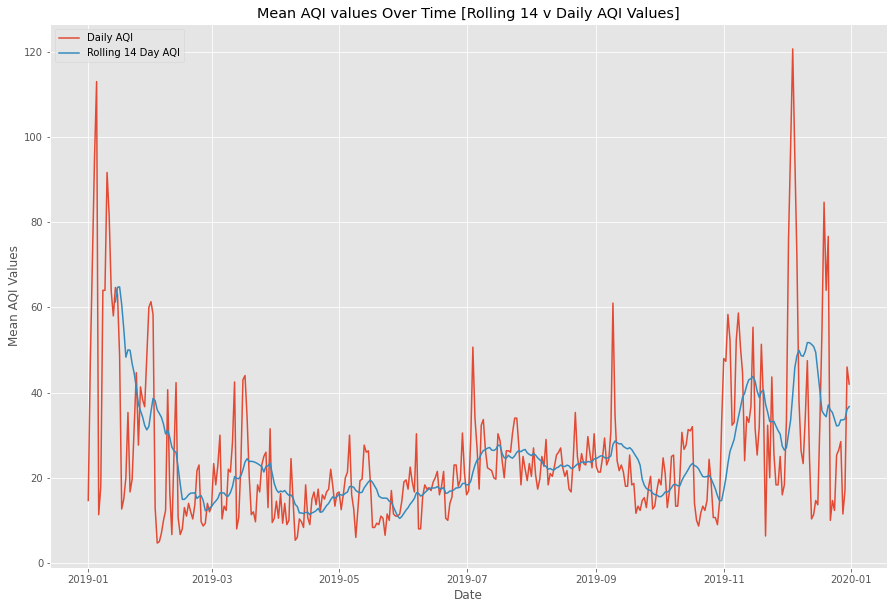

In [11]:
# Average over the POC for Daily AQI
air_data_sorted = air_data.groupby('Date')[['DAILY_AQI_VALUE']].mean().sort_index()

# Compute the rolling week average
air_data_sorted['Rolling AQI'] = air_data_sorted.rolling(14).mean()

# Plot the data
plt.plot(air_data_sorted.index, air_data_sorted['DAILY_AQI_VALUE'], label= 'Daily AQI')
plt.plot(air_data_sorted.index, air_data_sorted['Rolling AQI'], label='Rolling 14 Day AQI')
plt.xlabel('Date')
plt.ylabel('Mean AQI Values')
plt.title('Mean AQI values Over Time [Rolling 14 v Daily AQI Values]')
plt.legend()
plt.show()

## Part 2: A/B testing

First read the WIRED article on A/B testing [here](https://www.wired.com/2012/04/ff-abtesting/).

Suppose your company is developing a new logo. The art department develops two logos: ‘Logo A’ and ‘Logo B’, shown below. 
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)
Your job is to figure out which logo is better. 


You decide to conduct the following experiment. You use Google ads to buy 2000 advertisements. In $N_A=1000$ of the ads (randomly chosen), you use Logo A and in the other $N_B=1000$ ads, you use Logo B. Then you see which logo attracts more clicks.

It turns out that $n_A=500$ Logo A viewers click on the ad while $n_B=550$ Logo B viewers click on the ad. Obviously Logo B did better in this test, but is the difference *significant* enough to say that Logo B is better? Or, perhaps, Logo B just got lucky in this test? 

The goal of this exercise will be to conduct a two-proportion z-test to determine if Logo B is better. The steps will be similar to those from Lecture 7 used for the 1954 Salk polio-vaccine experiment.

### Task 2.1.  Formulate null hypothesis 

Let $p_A = n_A/N_A$ be the proportion of clicks on Logo A and similiarly $p_B$ be the proportion of clicks on Logo B. In terms of $p_A$ and $p_B$, clearly state the null and alternative hypothesis. 

**Your Solution:**

\begin{align*} 
H_0: p_A \geq p_B \\
H_A: p_A < p_B
\end{align*}

The null hypothesis is that the proportion of clicks on Logo A is greater than or equal to the proportion of clicks on Logo B. The alternative hypothesis is that the proportion of clicks on Logo B is greater than Logo A.

### Task 2.2.  Find the two-proportion z-value  

Assuming the null hypothesis, we know from lecture that the test statistic, called the *two-proportion z-value*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
is approximately  distributed according to the standard normal distribution. Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$. 


Find the two-proportion z-value.

In [9]:
from statsmodels.stats.proportion import proportions_ztest
counts = [500, 550]
sample_sizes = [1000, 1000]
z, pval = proportions_ztest(counts, sample_sizes)
print('This is the 2 proportion z value: {}'.format(z))

This is the 2 proportion z value: -2.238868314198227


### Task 2.3. Complete the two proportion z-test 

Find the $p$-value for the hypothesis test.

In [10]:
print('This is the p-value: {}'.format(pval))

This is the p-value: 0.025164485700318397


### Task 2.4. Interpretation

Interpret the $p$-value in this example and  state the result of the hypothesis test at the $\alpha=5\%$ and $\alpha=1\%$ significance levels. 


**Your Interpretation:**

If the level of significance was set at 5%, we would reject the null hyopthesis since the p-value is less than the level of significance. This means that logo B is statistically significantly better than Logo A. 

If the level of significance was set at 1%, we would fail to reject the null hypothesis and we cannot say that Logo B is statistically significantly better than Logo A. 